In [1]:
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Sequential
from keras.callbacks import LambdaCallback
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
import tensorflow_docs.vis.embed as embed
from PIL import Image
import glob
import re
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavefile
from moviepy.editor import *

# Text Goes Here
Arty description


In [57]:
img_size=1024 #Size of image in pixels
img_data=[] #Array for image
img=cv2.imread('color.png', 1) #reading image
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting to rgb
rgb_img=cv2.resize(rgb_img, (1024,1024)) #resizing image
img_data.append(img_to_array(rgb_img)) #converting image to array
img_final=np.reshape(img_data, (len(img_data),1024, 1024, 3)) #reshaping image to correct type
img_final=img_final.astype('float32')/255 #Normalizing image 
# print(img_final.dtype)
# print(img_final.shape)

float32
(1, 1024, 1024, 3)


In [58]:
model=Sequential()
#Encoder
model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(1024,1024,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(rate=0.3))

model.add(Conv2D(256, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(rate=0.3))




#Decoder

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

#compiling model
optimizer = tf.keras.optimizers.RMSprop(lr=0.00001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

model.summary()






Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 1024, 1024, 128)   3584      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 512, 512, 128)    0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 512, 512, 128)     0         
                                                                 
 conv2d_71 (Conv2D)          (None, 512, 512, 256)     295168    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 256, 256, 256)    0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 256, 256, 256)   

In [59]:

class AutoencoderPredictCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, data, save_dir):
        super(AutoencoderPredictCallback, self).__init__()
        self.model = model
        self.data = data
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        # Make predictions using the Autoencoder model
        reconstructed = self.model.predict(self.data)

        # Plot the reconstructed images
        fig = plt.figure(figsize=(15,15))
        plt.imshow(reconstructed.reshape(1024, 1024,3))
        plt.axis('off')

        # Save the plot as a PNG file
        if not os.path.exists(self.save_dir):
            os.makedirs(self.save_dir)
        plt.savefig(f"{self.save_dir}/reconstructed_epoch_0{epoch}.png")
        plt.close(fig)


In [60]:
epochs=200
save_dir = "./reconstructed_images/"
predict_callback = AutoencoderPredictCallback(model, img_final, save_dir)
model_train = model.fit(img_final, img_final, 
                        epochs=epochs, 
                        callbacks=[predict_callback]
                        )

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 2.8074 - accuracy: 0.3266
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 1.5993 - accuracy: 0.4737
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 1.3381 - accuracy: 0.4684
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 1.1850 - accuracy: 0.4667
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 1.0886 - accuracy: 0.4640
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 1.0107 - accuracy: 0.4677
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 0.9557 - accuracy: 0.4705
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 0.9240 - accuracy: 0.4736
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 0.8952 - accuracy: 0.4799
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 0.8714 - accuracy: 0.4863
Epoch 11/200
1/1 [=====================

1/1 [==============================] - 0s 16ms/step


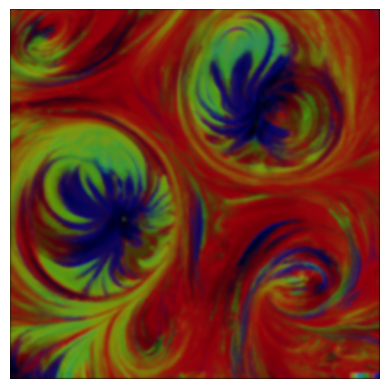

In [61]:
pred=model.predict(img_final)
plt.axis("off")
plt.imshow(pred.reshape(1024,1024,3))
#plt.savefig("recreatecat.png")

In [ ]:
for root, subfolder, filenames in os.walk("./reconstructed_images"):
    filenames.sort(key=lambda f: int(re.sub('\D', '', f)))
    print(filenames)
    for i, file in enumerate(filenames):
        img = Image.open(f"./reconstructed_images/{file}")
        box = (200,180,1328,1328)
        img2 = img.crop(box)
        img2.save(f"img_crop_{i}.png")

In [9]:

# Set the path to the folder containing the images
image_folder = './Cropped Images'

# Set the name of the output GIF file
output_file = 'animation2.gif'

# Get a list of all the image file names in the folder
image_files = glob.glob(image_folder + '*.png')

# Sort the file names alphabetically to ensure they are in the correct order
image_files.sort(key=lambda f: int(re.sub('\D', '', f)))

# Open each image and add it to a list
images = []
for filename in image_files:
    images.append(Image.open(filename))

# Save the images as a GIF
images[0].save(output_file, save_all=True, append_images=images[1:], duration=450, loop=0)


['./Cropped Images\\img_crop_0.png', './Cropped Images\\img_crop_1.png', './Cropped Images\\img_crop_2.png', './Cropped Images\\img_crop_3.png', './Cropped Images\\img_crop_4.png', './Cropped Images\\img_crop_5.png', './Cropped Images\\img_crop_6.png', './Cropped Images\\img_crop_7.png', './Cropped Images\\img_crop_8.png', './Cropped Images\\img_crop_9.png', './Cropped Images\\img_crop_10.png', './Cropped Images\\img_crop_11.png', './Cropped Images\\img_crop_12.png', './Cropped Images\\img_crop_13.png', './Cropped Images\\img_crop_14.png', './Cropped Images\\img_crop_15.png', './Cropped Images\\img_crop_16.png', './Cropped Images\\img_crop_17.png', './Cropped Images\\img_crop_18.png', './Cropped Images\\img_crop_19.png', './Cropped Images\\img_crop_20.png', './Cropped Images\\img_crop_21.png', './Cropped Images\\img_crop_22.png', './Cropped Images\\img_crop_23.png', './Cropped Images\\img_crop_24.png', './Cropped Images\\img_crop_25.png', './Cropped Images\\img_crop_26.png', './Cropped

In [ ]:
# Load the spectrogram image using OpenCV
n_fft = 512
hop_length = 4
sr=10000

def reconstruct_audio(image):
    spec_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    
    # Convert the spectrogram image to a numpy array
    spec_array = np.array(spec_image)
        
    # Denormalise Spectrogram
    spec_array = cv2.normalize(spec_array, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX) #Produces cleaner audio although a lot of frequency content is lost

    # Convert the spectrogram array to a magnitude spectrogram
    spec = librosa.db_to_amplitude(spec_array) 
        
    # Reconstruct the audio signal from the magnitude spectrogram
    y_reconstructed = librosa.feature.inverse.mel_to_audio(spec, sr=sr, n_fft=n_fft, n_iter=1, fmax=sr, hop_length=hop_length)
    
    #return y_reconstructed
    # Save the reconstructed audio signal as a WAV file
    return Audio(y_reconstructed, rate=sr)

In [ ]:
# Set the path to the folder containing the images
image_folder = './Cropped Images/'

# Get a list of all the image file names in the folder
image_files = glob.glob(image_folder + '*.png')
# Sort the file names alphabetically to ensure they are in the correct order

image_files.sort(key=lambda f: int(re.sub('\D', '', f)))
#image_files.sort(key=os.path.getmtime)
def create_final_audio(folder):
    
        audio = np.array([])
        for i, filename in enumerate(image_files):
            spec_image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        
            spec_array = np.array(spec_image)
 
            spec = librosa.db_to_amplitude(spec_array) 
      
            y_reconstructed = librosa.feature.inverse.mel_to_audio(spec, sr=sr, n_fft=n_fft, n_iter=1, fmax=sr, hop_length=hop_length)
            
          
            audio = np.append(audio, y_reconstructed)
        return audio

In [ ]:
final_array = create_final_audio(image_files)
Audio(final_array, rate=sr)

In [ ]:
pip install ffmpeg --upgrade

video = VideoFileClip('animation2.gif')
audio = AudioFileClip('final audio.wav')
video_with_audio = video.set_audio(audio)
video_with_audio.write_videofile('./joined.mp4')